See the three plots below for the result and [`opt.jl`](opt.jl) for the implementation.

In [1]:
using PyPlot

In [2]:
include("opt.jl")
using P5Opt

In [3]:
function gen_rosebrock_data{T}(::Type{T}, xs, ys)
    X = Matrix{T}(length(xs), length(ys))
    Y = similar(X)
    Z = similar(X)
    @inbounds for j in eachindex(ys)
        y = ys[j]
        @simd for i in eachindex(xs)
            Y[i, j] = y
            x = xs[i]
            X[i, j] = x
            z = Rosebrock()(x, y)
            Z[i, j] = z
        end
    end
    X, Y, Z
end

gen_rosebrock_data (generic function with 1 method)

In [4]:
function plot_func(xmin=-1.0, xmax=2.0, ymin=-0.2, ymax=1.5)
    Xr, Yr, Zr = gen_rosebrock_data(Float64, linspace(xmin, xmax, 1000),
                                    linspace(ymin, ymax, 1000))
    CS = contour(Xr, Yr, Zr, levels=(0:30).^2)
    clabel(CS, inline=1, fontsize=10, fmt="%.0f")
end

plot_func (generic function with 5 methods)

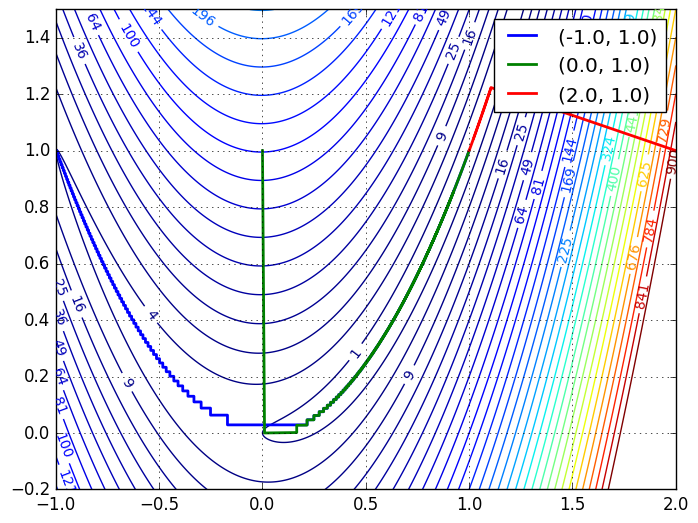

In [5]:
record1 = RecordXY{Float64}()
steepest_descent(Rosebrock(), [-1.0, 1.0], record1)
record2 = RecordXY{Float64}()
steepest_descent(Rosebrock(), [0.0, 1.0], record2)
record3 = RecordXY{Float64}()
steepest_descent(Rosebrock(), [2.0, 1.0], record3)

plot_func()
plot(record1.xs, record1.ys, label="(-1.0, 1.0)", linewidth=2)
plot(record2.xs, record2.ys, label="(0.0, 1.0)", linewidth=2)
plot(record3.xs, record3.ys, label="(2.0, 1.0)", linewidth=2)
legend()
grid()

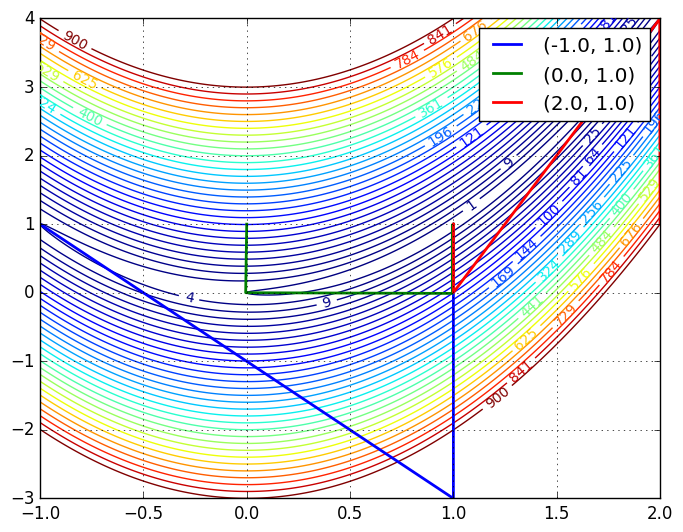

In [6]:
record1 = RecordXY{Float64}()
newton_min(Rosebrock(), [-1.0, 1.0], record1)
record2 = RecordXY{Float64}()
newton_min(Rosebrock(), [0.0, 1.0], record2)
record3 = RecordXY{Float64}()
newton_min(Rosebrock(), [2.0, 1.0], record3)

plot_func(-1.0, 2.0, -3.0, 4.0)
plot(record1.xs, record1.ys, label="(-1.0, 1.0)", linewidth=2)
plot(record2.xs, record2.ys, label="(0.0, 1.0)", linewidth=2)
plot(record3.xs, record3.ys, label="(2.0, 1.0)", linewidth=2)
legend()
grid()

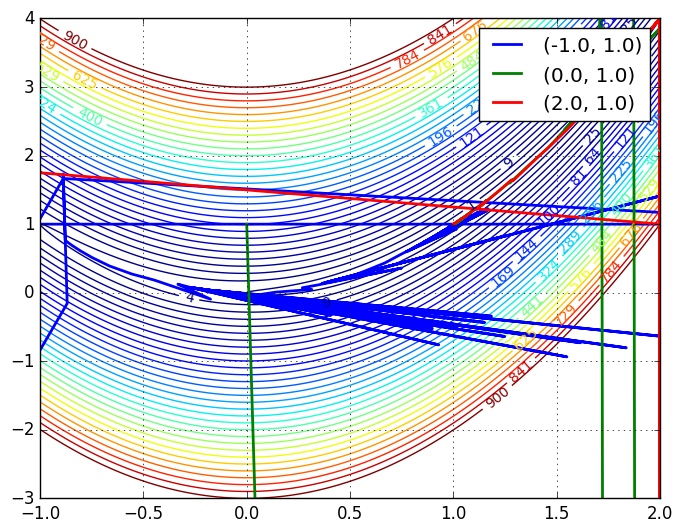

In [7]:
record1 = RecordXY{Float64}()
bfgs_min(Rosebrock(), [-1.0, 1.0], record1)
record2 = RecordXY{Float64}()
bfgs_min(Rosebrock(), [0.0, 1.0], record2)
record3 = RecordXY{Float64}()
bfgs_min(Rosebrock(), [2.0, 1.0], record3)

plot_func(-1.0, 2.0, -3.0, 4.0)
plot(record1.xs, record1.ys, label="(-1.0, 1.0)", linewidth=2)
plot(record2.xs, record2.ys, label="(0.0, 1.0)", linewidth=2)
plot(record3.xs, record3.ys, label="(2.0, 1.0)", linewidth=2)
xlim([-1.0, 2.0])
ylim([-3.0, 4.0])
legend()
grid()